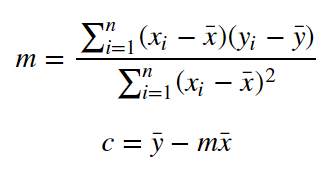

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data.csv')
df

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


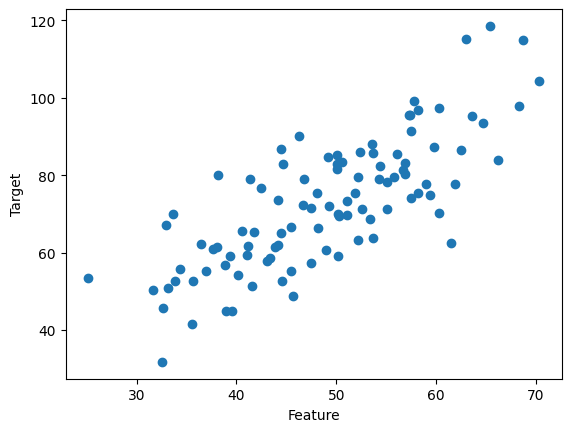

In [7]:
plt.scatter(df['X'],df['y'])
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

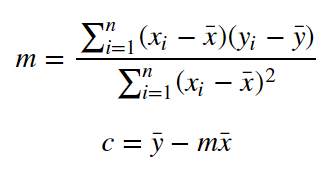

In [8]:
df.shape

(100, 2)

In [16]:
df['X'][99]

25.128484647772304

In [19]:
mean_y = df['y'].mean()
mean_x = df['X'].mean()


numr = 0
denor = 0

for i in range(len(df)):
    numr += (df['X'][i] - mean_x)*(df['y'][i]-mean_y)
    denor += (df['X'][i] - mean_x)**2
    
# print('Numerator',numr)
# print('Denominator',denor)

m = numr/denor
print('Slope',m)

Slope 1.32243102275536


In [20]:
c = mean_y - m*(mean_x)
print('Intercept',c)

Intercept 7.991020982270385


In [21]:
input_x = 49.239765
y_pred = m*input_x + c

print(y_pred)

73.10721377145396


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(df[['X']],df['y'])

LinearRegression()

In [26]:
lr.coef_[0]

1.3224310227553595

In [27]:
lr.intercept_

7.991020982270413

In [65]:
lr.score(df[['X']],df['y'])

0.5986557915386619

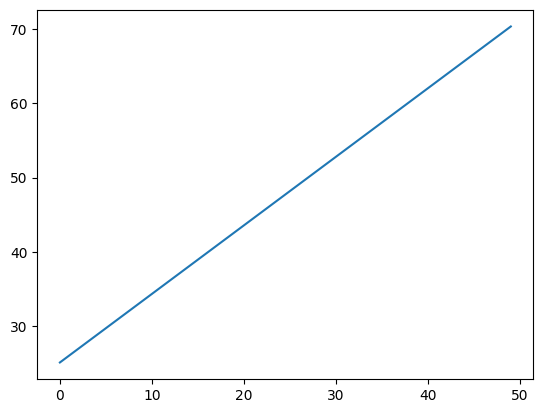

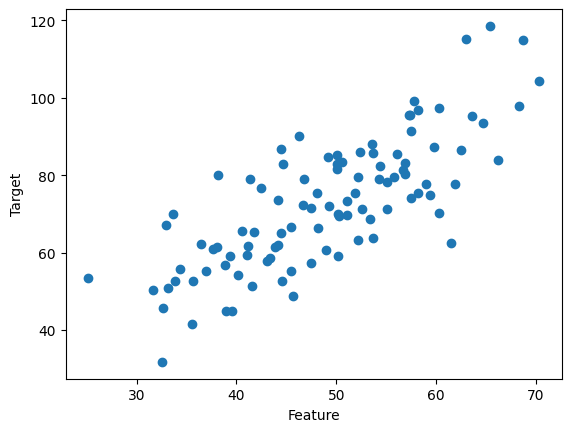

In [32]:
plt.scatter(df['X'],df['y'])
# plt.plot(np.linspace(min(df['X']),max(df['X']),50))
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [33]:
y_pred = m*df['X'] + c

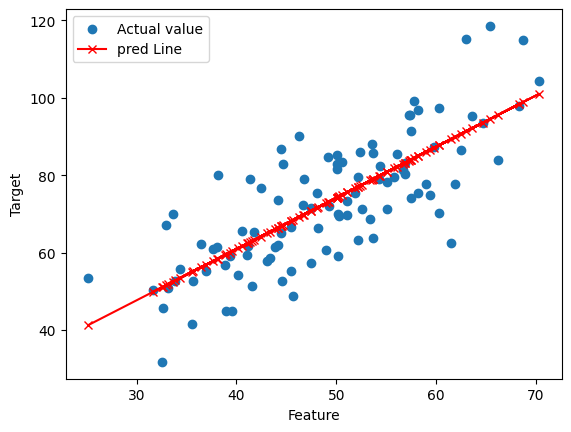

In [41]:
plt.scatter(df['X'],df['y'],label = 'Actual value')
# plt.plot(np.linspace(min(df['X']),max(df['X']),50))
plt.plot(df['X'],y_pred,color = 'r',label = 'pred Line',marker = 'x')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

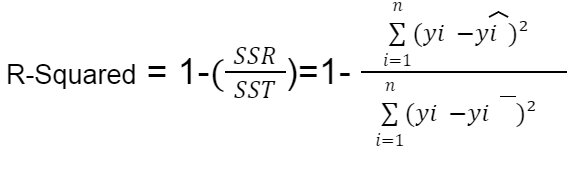

In [42]:
nr = 0
dr = 0

for i in range(len(df)):
    nr += (df['y'][i] - y_pred[i])**2
    
    dr += (df['y'][i] - mean_y)**2
    
    
r_squared = 1 - (nr/dr)

print(r_squared)

0.5986557915386619


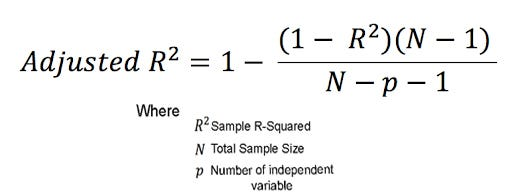

In [46]:
N = len(df)
p = 1

In [47]:
nr = (1 - r_squared)*(N-1)
dr = N - p -1

adjusted_r_squared = 1 - (nr/dr)

print(adjusted_r_squared)

0.5945604424727298


In [48]:
import statsmodels.api as sm

In [49]:
# y = mx + b

In [50]:
X = df['X']

In [51]:
X

0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
        ...    
95    50.030174
96    49.239765
97    50.039576
98    48.149859
99    25.128485
Name: X, Length: 100, dtype: float64

In [52]:
X = sm.add_constant(X)
X

,const,X
0,1.0,32.502345
1,1.0,53.426804
2,1.0,61.530358
3,1.0,47.475640
4,1.0,59.813208
...,...,...
95,1.0,50.030174
96,1.0,49.239765
97,1.0,50.039576
98,1.0,48.149859


In [54]:
y = df['y']
y

0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: y, Length: 100, dtype: float64

In [55]:
model = sm.OLS(y,X)
model

In [56]:
results = model.fit()

In [57]:
results

In [58]:
results.params

const    7.991021
X        1.322431
dtype: float64

In [59]:
m

1.32243102275536

In [61]:
c

7.991020982270385

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           3.86e-21
Time:                        11:48:34   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9910      5.459      1.464      0.146      -2.842      18.824
X              1.3224      0.109     12.090      0.000       1.105       1.539
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
7.9910/5.459

1.4638212126763144

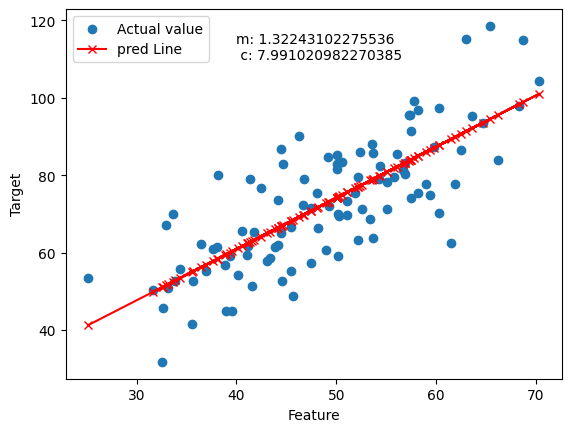

In [76]:
mean_y = df['y'].mean()
mean_x = df['X'].mean()


numr = 0
denor = 0

for i in range(len(df)):
    numr += (df['X'][i] - mean_x)*(df['y'][i]-mean_y)
    denor += (df['X'][i] - mean_x)**2
    


    m = numr/denor
# print('Slope',m)


    c = mean_y - m*(mean_x)
# print('Intercept',c)

    y_pred = m*df['X'] + c




    plt.scatter(df['X'],df['y'],label = 'Actual value')
    # plt.plot(np.linspace(min(df['X']),max(df['X']),50))
    plt.plot(df['X'],y_pred,color = 'r',label = 'pred Line',marker = 'x')
    plt.annotate(text=f'm: {m}\n c: {c}',xy=(40,110))
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()
    display(clear=True)

In [ ]:
plt.annotate(text=)